
# SMS Spam Detection using Naive Bayes

## Objective
The goal of this project is to build a simple spam detection system using the Naive Bayes classifier. We will classify text messages (SMS) as either **'spam'** or **'ham'** (not spam). This project uses the SMS Spam Collection Dataset from the UCI Machine Learning Repository.

## Steps Involved
1. Load and understand the dataset.
2. Perform basic data preprocessing.
3. Visualize data distribution using Seaborn and Pyplot.
4. Convert text data into numerical features using CountVectorizer.
5. Train a Naive Bayes classifier using scikit-learn.
6. Evaluate the model using accuracy, precision, recall, and confusion matrix.


In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Step 1: Load and Explore the Dataset

In [19]:

# Load the dataset
df = pd.read_csv('./spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:

# Dataset overview
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## Step 2: Visualize Class Distribution

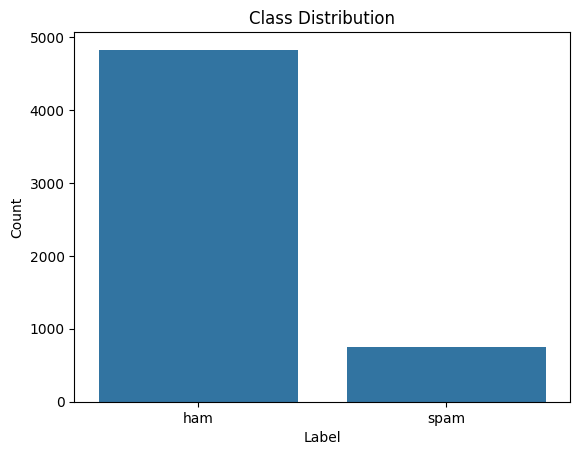

In [21]:

# Visualize class distribution
sns.countplot(x='label', data=df)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


## Step 3: Data Preprocessing

In [22]:

# Encode labels: 'ham' = 0, 'spam' = 1
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

# Separate features and target
X = df['message']
y = df['label_num']


## Step 4: Feature Extraction using CountVectorizer

In [23]:

# Convert text to numerical feature vectors
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)


## Step 5: Train-Test Split

In [24]:

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


## Step 6: Train Naive Bayes Classifier

In [25]:

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

## Step 7: Evaluate the Model

Accuracy: 0.97847533632287

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.93      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



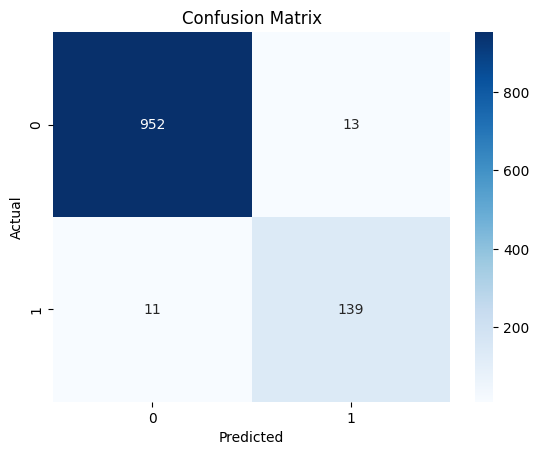

In [26]:

y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



## Conclusion

- We successfully built a spam detection model using the Naive Bayes classifier.
- The model showed high accuracy and good performance across precision, recall, and F1-score metrics.
- Naive Bayes proved to be an effective algorithm for this text classification task due to its simplicity and speed.
